In [ ]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


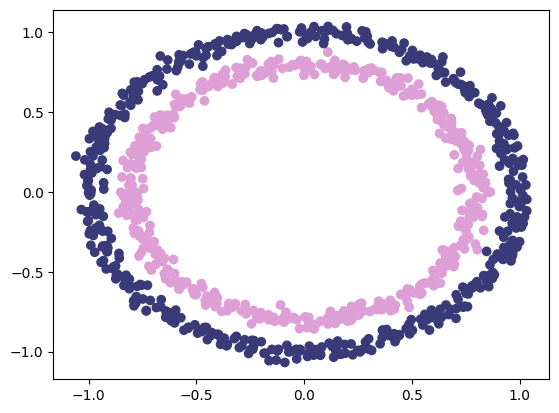

In [ ]:
from matplotlib import pyplot as plt


plt.scatter(X[:,0], X[:,1], c=y, cmap="tab20b");



800
800


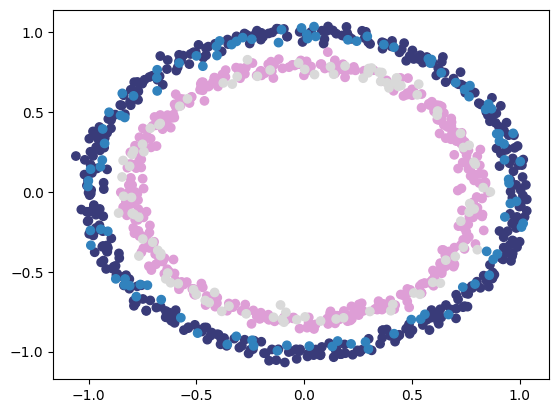

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                   random_state=42)
print(len(X_train))
print(len(y_train))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="tab20b")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="tab20c")
plt.show()

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train = torch.Tensor(X_train).to(device)
y_train = torch.Tensor(y_train).to(device)
X_test = torch.Tensor(X_test).to(device)
y_test = torch.Tensor(y_test).to(device)

X_train.device

device(type='cuda', index=0)

In [ ]:
torch.manual_seed(42)
model2 = nn.Sequential(
    nn.Linear(in_features=2, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=1)
)
model2.to(device)


Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss();

optimizer = torch.optim.Adam(params=model2.parameters(),
                            lr=0.01)


In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
torch.cuda.manual_seed(42)
import numpy as np

epochs = 200

X_train = torch.Tensor(X_train).to(device)
y_train = torch.Tensor(y_train).to(device)
X_test = torch.Tensor(X_test).to(device)
y_test = torch.Tensor(y_test).to(device)

x_min, x_max = X_train[:, 0].min().item() - 0.1, X_train[:, 0].max().item() + 0.1
y_min, y_max = X_train[:, 1].min().item() - 0.1, X_train[:, 1].max().item() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32).to(device)

train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

z_history = []

for epoch in range(epochs):
  model2.train()

  y_logits = model2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))


  loss = loss_fn(y_logits,
                 y_train)
  train_loss_hist.append(loss.item())
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  train_acc_hist.append(acc)
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model2.eval()
  with torch.inference_mode():
    test_logits = model2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_loss_hist.append(test_loss.item())
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    test_acc_hist.append(test_acc)

    logits = model2(grid).squeeze()
    Z = torch.sigmoid(logits).cpu().numpy().reshape(xx.shape)
    z_history.append(Z)


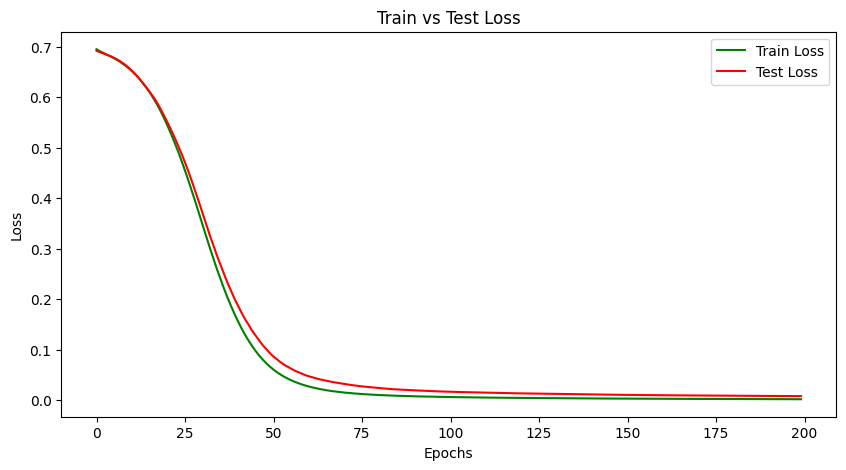

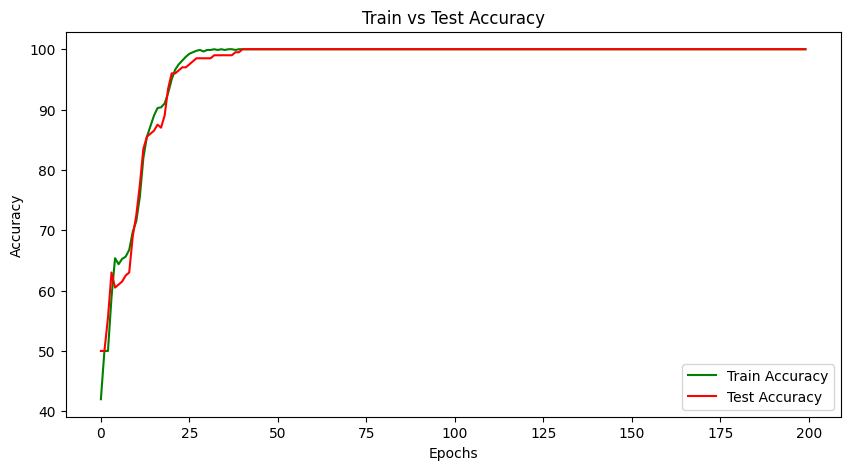

In [ ]:


# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_hist, color='green', label='Train Loss')
plt.plot(test_loss_hist, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc_hist, color='green', label='Train Accuracy')
plt.plot(test_acc_hist, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()

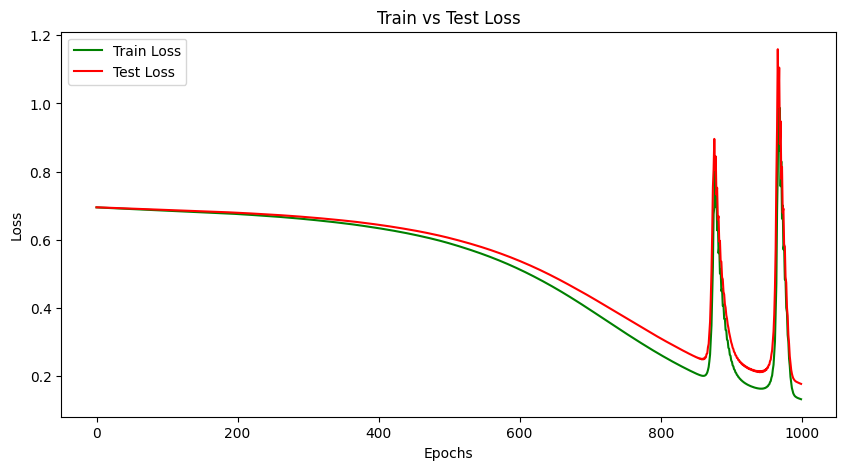

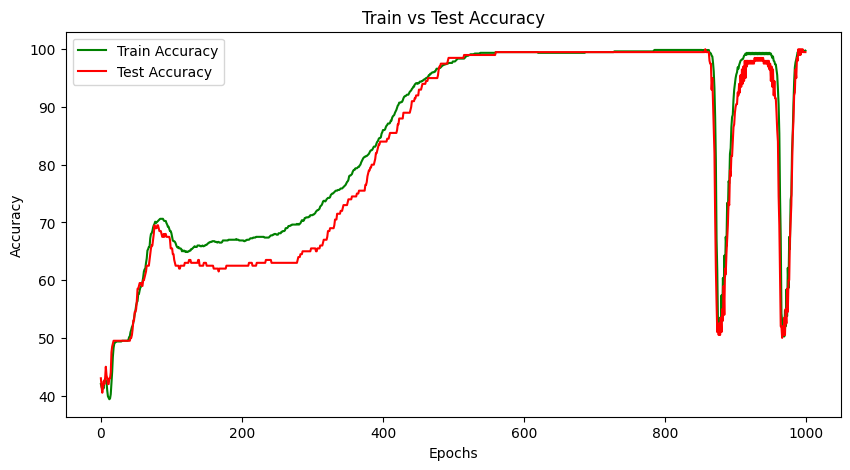

In [ ]:
torch.manual_seed(42)

model2 = nn.Sequential(
    nn.Linear(in_features=2, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=1)
)
model2.to(device)


optimizer = torch.optim.SGD(params=model2.parameters(),
                            lr=0.1)
torch.cuda.manual_seed(42)


epochs = 1000

X_train = torch.Tensor(X_train).to(device)
y_train = torch.Tensor(y_train).to(device)
X_test = torch.Tensor(X_test).to(device)
y_test = torch.Tensor(y_test).to(device)

x_min, x_max = X_train[:, 0].min().item() - 0.1, X_train[:, 0].max().item() + 0.1
y_min, y_max = X_train[:, 1].min().item() - 0.1, X_train[:, 1].max().item() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32).to(device)

train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

z_history = []

for epoch in range(epochs):
  model2.train()

  y_logits = model2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))


  loss = loss_fn(y_logits,
                 y_train)
  train_loss_hist.append(loss.item())
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  train_acc_hist.append(acc)
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model2.eval()
  with torch.inference_mode():
    test_logits = model2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_loss_hist.append(test_loss.item())
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    test_acc_hist.append(test_acc)

    logits = model2(grid).squeeze()
    Z = torch.sigmoid(logits).cpu().numpy().reshape(xx.shape)
    z_history.append(Z)

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_hist, color='green', label='Train Loss')
plt.plot(test_loss_hist, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc_hist, color='green', label='Train Accuracy')
plt.plot(test_acc_hist, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


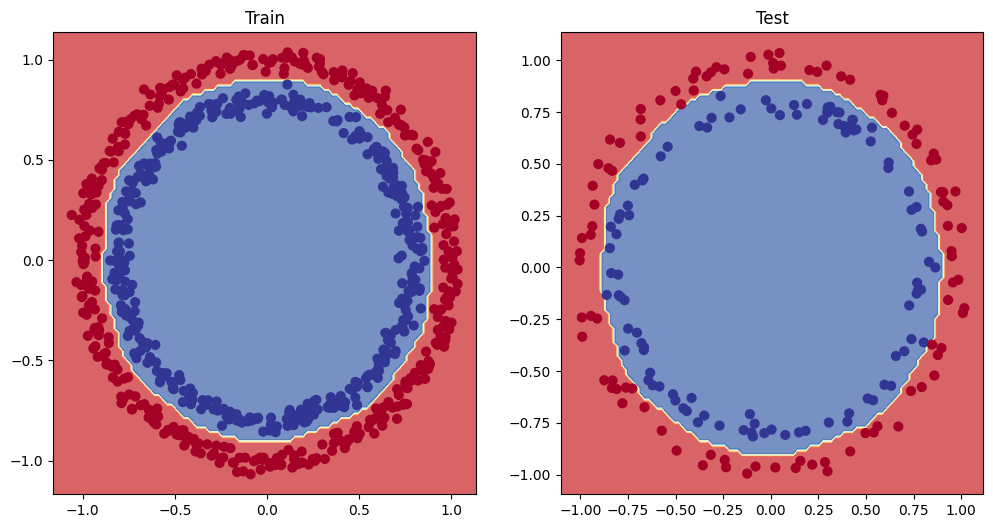

In [ ]:

from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model2, X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt
import imageio
from PIL import Image
import io

frames = []
for epoch in range(0, epochs, 5):
    fig = plt.figure(figsize=(20, 12))

    # Loss plot
    plt.subplot(2, 2, 1)
    plt.plot(train_loss_hist[:epoch+1], 'g-', label='Train Loss')
    plt.plot(test_loss_hist[:epoch+1], 'r-', label='Test Loss')
    plt.title(f"Epoch {epoch+1}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy plot
    plt.subplot(2, 2, 2)
    plt.plot(train_acc_hist[:epoch+1], 'g-', label='Train Accuracy')
    plt.plot(test_acc_hist[:epoch+1], 'r-', label='Test Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Train decision boundary
    plt.subplot(2, 2, 3)
    plt.contourf(xx, yy, z_history[epoch], levels=[0, 0.5, 1], alpha=0.3)
    plt.scatter(X_train.cpu()[:, 0], X_train.cpu()[:, 1], c=y_train.cpu(), cmap=plt.cm.RdYlBu)
    plt.title("Train Decision Boundary")

    # Test decision boundary
    plt.subplot(2, 2, 4)
    plt.contourf(xx, yy, z_history[epoch], levels=[0, 0.5, 1], alpha=0.3)
    plt.scatter(X_test.cpu()[:, 0], X_test.cpu()[:, 1], c=y_test.cpu(), cmap=plt.cm.RdYlBu)
    plt.title("Test Decision Boundary")

    plt.tight_layout()

    # Save to buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=80)
    buf.seek(0)
    frames.append(Image.open(buf))
    plt.close(fig)

# Save as GIF
frames[0].save('training_animation.gif', save_all=True,
               append_images=frames[1:], duration=100, loop=0)